In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from rdkit import Chem 


data = pd.read_table('cardiotoxity-regression.txt', sep='\t')[['SMILES', 'AC50']]
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33354 entries, 0 to 33353
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SMILES  32928 non-null  object 
 1   AC50    14493 non-null  float64
dtypes: float64(1), object(1)
memory usage: 521.3+ KB


In [2]:
data = data.dropna(subset=['SMILES'])
data = data.drop_duplicates(subset=['SMILES'], keep='last')
data = data.fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7690 entries, 1209 to 33353
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SMILES  7690 non-null   object 
 1   AC50    7690 non-null   float64
dtypes: float64(1), object(1)
memory usage: 180.2+ KB


In [3]:
def get_mol(x):
    try:
        return Chem.MolFromSmiles(x)
    except:
        return None
data['molecula'] = data['SMILES'].apply(get_mol) 

RDKit ERROR: [19:12:40] Can't kekulize mol.  Unkekulized atoms: 2 3 4 6 7
RDKit ERROR: 
RDKit ERROR: [19:12:40] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10 11 12 13 16
RDKit ERROR: 
RDKit ERROR: [19:12:40] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [19:12:40] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
RDKit ERROR: 
RDKit ERROR: [19:12:40] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10 11 12 13 14
RDKit ERROR: 
RDKit ERROR: [19:12:40] Can't kekulize mol.  Unkekulized atoms: 27 28 29 30 31 32 33 34 35 36 37 38 39
RDKit ERROR: 
RDKit ERROR: [19:12:40] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
RDKit ERROR: 
RDKit ERROR: [19:12:40] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
RDKit ERROR: 
RDKit ERROR: [19:12:40] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [19:12:40] Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17 18 19 20 21
RDKit ERROR: 
RDKit ERROR: [19:12:40] Can

In [4]:
data = data.dropna(subset=['molecula'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7524 entries, 1209 to 33353
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMILES    7524 non-null   object 
 1   AC50      7524 non-null   float64
 2   molecula  7524 non-null   object 
dtypes: float64(1), object(2)
memory usage: 235.1+ KB


In [5]:
from rdkit.Chem import Fragments

data['fr_Al_COO'] = data['molecula'].apply(Fragments.fr_Al_COO)
data['fr_Al_OH'] = data['molecula'].apply(Fragments.fr_Al_OH)
data['fr_ArN'] = data['molecula'].apply(Fragments.fr_ArN)
data['fr_Ar_COO'] = data['molecula'].apply(Fragments.fr_Ar_COO)
data['fr_Ar_N'] = data['molecula'].apply(Fragments.fr_Ar_N)
data['fr_Ar_NH'] = data['molecula'].apply(Fragments.fr_Ar_NH)
data['fr_Ar_OH'] = data['molecula'].apply(Fragments.fr_Ar_OH)
data['fr_COO'] = data['molecula'].apply(Fragments.fr_COO)
data['fr_COO2'] = data['molecula'].apply(Fragments.fr_COO2)
data['fr_C_O'] = data['molecula'].apply(Fragments.fr_C_O)
data['fr_aldehyde'] = data['molecula'].apply(Fragments.fr_aldehyde)
data['fr_amide'] = data['molecula'].apply(Fragments.fr_amide)
data['fr_amidine'] = data['molecula'].apply(Fragments.fr_amidine)
data['fr_aniline'] = data['molecula'].apply(Fragments.fr_aniline)
data['fr_aryl_methyl'] = data['molecula'].apply(Fragments.fr_aryl_methyl)
data['fr_azide'] = data['molecula'].apply(Fragments.fr_azide)
data['fr_barbitur'] = data['molecula'].apply(Fragments.fr_barbitur)
data['fr_benzene'] = data['molecula'].apply(Fragments.fr_benzene)
data['fr_C_S'] = data['molecula'].apply(Fragments.fr_C_S)
data['fr_HOCCN'] = data['molecula'].apply(Fragments.fr_HOCCN)
data['fr_Imine'] = data['molecula'].apply(Fragments.fr_Imine)
data['fr_NH0'] = data['molecula'].apply(Fragments.fr_NH0)
data['fr_N_O'] = data['molecula'].apply(Fragments.fr_N_O)
data['fr_Ndealkylation2'] = data['molecula'].apply(Fragments.fr_Ndealkylation2)
data['fr_SH'] = data['molecula'].apply(Fragments.fr_SH)
data['fr_allylic_oxid'] = data['molecula'].apply(Fragments.fr_allylic_oxid)
data['fr_azo'] = data['molecula'].apply(Fragments.fr_azo)
data['fr_benzodiazepine'] = data['molecula'].apply(Fragments.fr_benzodiazepine)
data['fr_bicyclic'] = data['molecula'].apply(Fragments.fr_bicyclic)
data['fr_diazo'] = data['molecula'].apply(Fragments.fr_diazo)
data['fr_dihydropyridine'] = data['molecula'].apply(Fragments.fr_dihydropyridine)
data['fr_epoxide'] = data['molecula'].apply(Fragments.fr_epoxide)
data['fr_ester'] = data['molecula'].apply(Fragments.fr_ester)
data['fr_ether'] = data['molecula'].apply(Fragments.fr_ether)
data['fr_furan'] = data['molecula'].apply(Fragments.fr_furan)
data['fr_guanido'] = data['molecula'].apply(Fragments.fr_guanido)
data['fr_furan'] = data['molecula'].apply(Fragments.fr_furan)
data['fr_halogen'] = data['molecula'].apply(Fragments.fr_halogen)
data['fr_hdrzine'] = data['molecula'].apply(Fragments.fr_hdrzine)
data['fr_hdrzone'] = data['molecula'].apply(Fragments.fr_hdrzone)
data['fr_imidazole'] = data['molecula'].apply(Fragments.fr_imidazole)
data['fr_isocyan'] = data['molecula'].apply(Fragments.fr_isocyan)
data['fr_isothiocyan'] = data['molecula'].apply(Fragments.fr_isothiocyan)
data['fr_ketone'] = data['molecula'].apply(Fragments.fr_ketone)
data['fr_lactam'] = data['molecula'].apply(Fragments.fr_lactam)
data['fr_lactone'] = data['molecula'].apply(Fragments.fr_lactone)
data['fr_methoxy'] = data['molecula'].apply(Fragments.fr_methoxy)
data['fr_morpholine'] = data['molecula'].apply(Fragments.fr_morpholine)
data['fr_nitrile'] = data['molecula'].apply(Fragments.fr_nitrile)
data['fr_nitro'] = data['molecula'].apply(Fragments.fr_nitro)
data['fr_nitro_arom'] = data['molecula'].apply(Fragments.fr_nitro_arom)
data['fr_nitroso'] = data['molecula'].apply(Fragments.fr_nitroso)
data['fr_oxazole'] = data['molecula'].apply(Fragments.fr_oxazole)
data['fr_oxime'] = data['molecula'].apply(Fragments.fr_oxime)
data['fr_para_hydroxylation'] = data['molecula'].apply(Fragments.fr_para_hydroxylation)
data['fr_phenol'] = data['molecula'].apply(Fragments.fr_phenol)
data['fr_phos_acid'] = data['molecula'].apply(Fragments.fr_phos_acid)
data['fr_phos_ester'] = data['molecula'].apply(Fragments.fr_phos_ester)
data['fr_piperdine'] = data['molecula'].apply(Fragments.fr_piperdine)
data['fr_piperzine'] = data['molecula'].apply(Fragments.fr_piperzine)
data['fr_priamide'] = data['molecula'].apply(Fragments.fr_priamide)
data['fr_prisulfonamd'] = data['molecula'].apply(Fragments.fr_prisulfonamd)
data['fr_pyridine'] = data['molecula'].apply(Fragments.fr_pyridine)
data['fr_quatN'] = data['molecula'].apply(Fragments.fr_quatN)
data['fr_sulfide'] = data['molecula'].apply(Fragments.fr_sulfide)
data['fr_sulfonamd'] = data['molecula'].apply(Fragments.fr_sulfonamd)
data['fr_sulfone'] = data['molecula'].apply(Fragments.fr_sulfone)
data['fr_term_acetylene'] = data['molecula'].apply(Fragments.fr_term_acetylene)
data['fr_tetrazole'] = data['molecula'].apply(Fragments.fr_tetrazole)
data['fr_thiazole'] = data['molecula'].apply(Fragments.fr_thiazole)
data['fr_thiocyan'] = data['molecula'].apply(Fragments.fr_thiocyan)
data['fr_thiophene'] = data['molecula'].apply(Fragments.fr_thiophene)
data['fr_unbrch_alkane'] = data['molecula'].apply(Fragments.fr_unbrch_alkane)
data['fr_urea'] = data['molecula'].apply(Fragments.fr_urea)


In [6]:
corr = data.corr()
# plt.figure(figsize = (16,5))
# sns.heatmap(corr, vmax=1, vmin=-1,
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values,
#             annot=True, fmt=".3f")
corr_matrix = data.corr()['AC50'].abs()
sorted_corr = corr_matrix.sort_values(ascending=False)
need_drop = sorted_corr[15:].index

<AxesSubplot:>

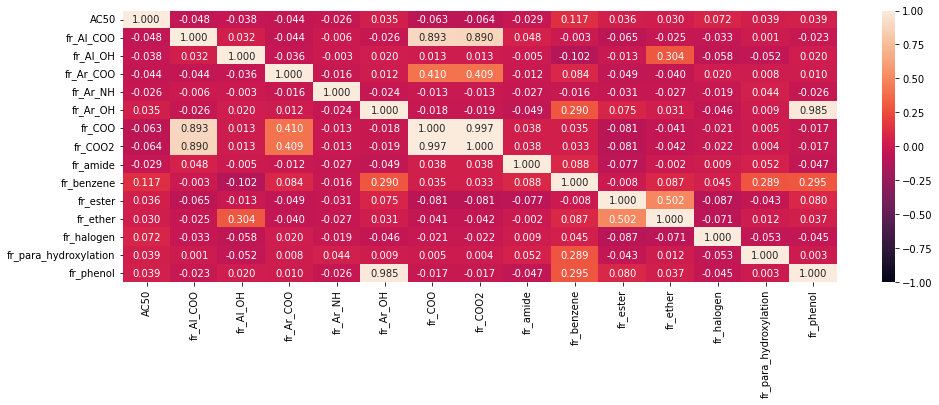

In [7]:
corr = data.drop(need_drop, axis=1).corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr, vmax=1, vmin=-1,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt=".3f")

In [8]:
from rdkit.Chem import AllChem
from rdkit.Chem import rdchem

# generate a conformer for each molecule
data['molecula'] = data['molecula'].apply(lambda x: AllChem.AddHs(x))
data['molecula'].apply(lambda x: AllChem.EmbedMolecule(x))



RDKit ERROR: [19:12:49] UFFTYPER: Unrecognized charge state for atom: 4
RDKit ERROR: [19:12:50] UFFTYPER: Unrecognized atom type: Cu3 (0)
RDKit WARNING: [19:12:50] UFFTYPER: Warning: hybridization set to SP3 for atom 1
RDKit ERROR: [19:12:50] UFFTYPER: Unrecognized charge state for atom: 1
RDKit WARNING: [19:12:52] UFFTYPER: Warning: hybridization set to SP3 for atom 1
RDKit ERROR: [19:12:52] UFFTYPER: Unrecognized charge state for atom: 1
RDKit ERROR: [19:12:52] UFFTYPER: Unrecognized atom type: Ba (0)
RDKit WARNING: [19:12:59] UFFTYPER: Warning: hybridization set to SP3 for atom 1
RDKit ERROR: [19:12:59] UFFTYPER: Unrecognized charge state for atom: 1
RDKit ERROR: [19:12:59] UFFTYPER: Unrecognized charge state for atom: 6
RDKit ERROR: [19:13:00] UFFTYPER: Unrecognized charge state for atom: 1
RDKit WARNING: [19:13:00] UFFTYPER: Warning: hybridization set to SP3 for atom 1
RDKit ERROR: [19:13:01] UFFTYPER: Unrecognized atom type: Cu5 (0)
RDKit ERROR: [19:13:01] UFFTYPER: Unrecognized 

1209     0
1767     0
2307     0
2629     0
2657     0
        ..
33349    0
33350    0
33351    0
33352    0
33353    0
Name: molecula, Length: 7524, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7524 entries, 1209 to 33353
Data columns (total 76 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SMILES                 7524 non-null   object 
 1   AC50                   7524 non-null   float64
 2   molecula               7524 non-null   object 
 3   fr_Al_COO              7524 non-null   int64  
 4   fr_Al_OH               7524 non-null   int64  
 5   fr_ArN                 7524 non-null   int64  
 6   fr_Ar_COO              7524 non-null   int64  
 7   fr_Ar_N                7524 non-null   int64  
 8   fr_Ar_NH               7524 non-null   int64  
 9   fr_Ar_OH               7524 non-null   int64  
 10  fr_COO                 7524 non-null   int64  
 11  fr_COO2                7524 non-null   int64  
 12  fr_C_O                 7524 non-null   int64  
 13  fr_aldehyde            7524 non-null   int64  
 14  fr_amide               7524 non-null   int64  
 15  

In [10]:
data.head()

,SMILES,AC50,molecula,fr_Al_COO,fr_Al_OH,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
1209,Cl.CN3CCCN=C3COC(=O)C(O)(c1ccccc1)C2CCCCC2,4.771562,<rdkit.Chem.rdchem.Mol object at 0x7f197e67c350>,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1767,[K+].FC(F)(C(F)(F)S([O-])(=O)=O)C(F)(F)C(F)(F)...,0.000000,<rdkit.Chem.rdchem.Mol object at 0x7f197e67c3f0>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2307,Clc1ccc(cc1Cl)C(=O)NC(CCC(=O)O)C(=O)N(CCCCC)CCCOC,0.000000,<rdkit.Chem.rdchem.Mol object at 0x7f197e67c440>,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
2629,ON=CC=NO,0.000000,<rdkit.Chem.rdchem.Mol object at 0x7f197e67c490>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2657,CN(C)CCOC(=O)c1cc3c(cc1)n(Cc2ccccc2)c(C)c3C,6.007040,<rdkit.Chem.rdchem.Mol object at 0x7f197e67c4e0>,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
def get_mol_shape(x):
    try:
        return AllChem.ComputeMolShape(x, x.GetConformer().GetId())
    except:
        return None


data['shape']= data['molecula'].apply(get_mol_shape)
data['shape'].isna().sum()

38

In [12]:
temp = data[['AC50', 'shape']]
temp['shape']

1209     <rdkit.Geometry.rdGeometry.UniformGrid3D_ obje...
1767     <rdkit.Geometry.rdGeometry.UniformGrid3D_ obje...
2307     <rdkit.Geometry.rdGeometry.UniformGrid3D_ obje...
2629     <rdkit.Geometry.rdGeometry.UniformGrid3D_ obje...
2657     <rdkit.Geometry.rdGeometry.UniformGrid3D_ obje...
                               ...                        
33349    <rdkit.Geometry.rdGeometry.UniformGrid3D_ obje...
33350    <rdkit.Geometry.rdGeometry.UniformGrid3D_ obje...
33351    <rdkit.Geometry.rdGeometry.UniformGrid3D_ obje...
33352    <rdkit.Geometry.rdGeometry.UniformGrid3D_ obje...
33353    <rdkit.Geometry.rdGeometry.UniformGrid3D_ obje...
Name: shape, Length: 7524, dtype: object

In [ ]:
temp['x_coords'] = temp['shape'].apply(lambda x: print(x))
temp['x_coords']

In [14]:
def get_mol_volume(x):
    try:
        return AllChem.ComputeMolVolume(x, x.GetConformer().GetId())
    except:
        return None

temp['volume'] = data['molecula'].apply(get_mol_volume)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


KeyError: 'volume'

In [16]:
temp['volume'].head()

1209    334.312
1767    230.496
2307    413.832
2629     76.728
2657    338.992
Name: volume, dtype: float64

In [18]:
data['volume'] = temp['volume'].fillna(temp['volume'].median())

In [20]:
data[['AC50', 'volume']].corr()

,AC50,volume
AC50,1.000000,0.090749
volume,0.090749,1.000000
